### Import libraries

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.linear_model import LinearRegression,Lasso,Ridge,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle

### Define useful functions

In [2]:
def extract_zip_code(hotel_address):
    address_tmp = hotel_address.split(',')[-2].strip(' ').split(' ')[-1][:3]
    if address_tmp == 'NY1':
        return hotel_address.split(',')[-2].strip(' ').split(' ')[-1][2:5]
    else:
        return address_tmp

def extract_price(hotel_room_price):
    room_price_tmp = hotel_room_price.strip('\r').strip('US$')
    if room_price_tmp == '':
        return None
    else:
        room_price_tmp = room_price_tmp.replace(',' , '')
        return float(room_price_tmp)
    
def extract_capacity(hotel_room_capacity):
    if pd.isnull(hotel_room_capacity):
        return None
    else:
        return int(hotel_room_capacity[-1])

def extract_chain(hotel_name):
    hotel_name_lower=hotel_name.lower()
    if 'doubletree by hilton' in hotel_name_lower:
        return 'Doubletree Hilton'
    elif 'homewood suites by hilton' in hotel_name_lower:
        return 'Homewood Suites Hilton'
    elif 'hilton garden' in hotel_name_lower:
        return 'Hilton Garden'
    elif 'home2' in hotel_name_lower:
        return 'Home2 Hilton'
    elif 'tru' in hotel_name_lower:
        return 'Tru Hilton'
    elif 'hilton' in hotel_name_lower:
        return 'Hilton'
    
    elif 'courtyard by marriott' in hotel_name_lower:
        return 'Courtyard Marriott'
    elif 'fairfield inn' in hotel_name_lower:
        return 'Fairfield Inn Marriott'
    elif 'residence inn by marriott' in hotel_name_lower:
        return 'Residence Inn Marriott'
    elif 'marriott' in hotel_name_lower:
        return 'Marriott'
    
    elif 'hyatt' in hotel_name_lower:
        return 'Hyatt'
    elif 'wyndham' in hotel_name_lower:
        return 'Wyndham'
    elif 'embassy' in hotel_name_lower:
        return 'Embassy'
    elif 'sheraton' in hotel_name_lower:
        return 'Sheraton'
    elif 'radisson' in hotel_name_lower:
        return 'Radisson'
    elif 'best western' in hotel_name_lower:
        return 'Best Western'
    elif 'hampton' in hotel_name_lower:
        return 'Hampton'
    elif 'holiday inn' in hotel_name_lower:
        return 'Holiday Inn'
    elif 'westin' in hotel_name_lower:
        return 'Westin'
    elif 'red roof' in hotel_name_lower:
        return 'Red Roof'
    else:
        return 'No chain'

def extract_hotel_room_name(hotel_room_name):
    hotel_room_name_lower=str(hotel_room_name).lower()
    if 'king' in hotel_room_name_lower:
        return 'King'
    elif 'queen' in hotel_room_name_lower:
        return 'Queen'
    elif 'double' in hotel_room_name_lower:
        return 'Double'
    elif 'dormitory' in hotel_room_name_lower:
        return 'Dorm'
    else:
        return 'Other'
       
def extract_hotel_stars(hotel_stars):
    if hotel_stars in ['1 stars', '1-star hotel']:
        return 1.0
    elif hotel_stars in ['1.5 stars', '1.5 star hotel']:
        return 1.5
    elif hotel_stars in ['2 stars', '2-star hotel']:
        return 2.0
    elif hotel_stars in ['2.5 stars', '2.5 star hotel']:
        return 2.5
    elif hotel_stars in ['3 stars', '3-star hotel']:
        return 3.0
    elif hotel_stars in ['3.5 stars', '3.5 star hotel']:
        return 3.5
    elif hotel_stars in ['4 stars', '4-star hotel']:
        return 4.0
    elif hotel_stars in ['4.5 stars', '4.5 star hotel']:
        return 4.5
    elif hotel_stars in ['5 stars', '5-star hotel']:
        return 5.0
    else:
        return None
    
def extract_cleanliness_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[0]
    if item_tmp.split(',')[0]=="'Cleanliness'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_comfort_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[1]
    if item_tmp.split(',')[0]=="'Comfort'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_location_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[2]
    if item_tmp.split(',')[0]=="'Location'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_facilities_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[3]
    if item_tmp.split(',')[0]=="'Facilities'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_staff_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[4]
    if item_tmp.split(',')[0]=="'Staff'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_value_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')[5]
    if item_tmp.split(',')[0]=="'Value for money'":
        return float(item_tmp.split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def extract_wifi_rating(hotel_rating_breakdown):
    item_tmp = hotel_rating_breakdown.strip('[]').split('], [')
    if len(item_tmp)<7:
        return None
    elif item_tmp[6].split(',')[0]=="'Free WiFi'":
        return float(item_tmp[6].split(',')[1].strip(' ').strip("''"))
    else:
        return None
    
def filter_zip_code(hotel_address_zip_code):
    hotel_address_zip_code_short = hotel_address_zip_code[:3]
    zip_code_list = ['100','101','102','103','104','107','110','111','112','113','114','116']
    if hotel_address_zip_code_short not in zip_code_list:
        return None
    else:
        return hotel_address_zip_code

### Import datasets

In [1315]:
df_hotel_detailed_info_list = pd.read_csv('./datasets/sample0_nys_hotel_detailed_info_list.csv',lineterminator='\n')
df_hotel_detailed_info_list_2 = pd.read_csv('./datasets/sample1_nys_hotel_detailed_info_list.csv',lineterminator='\n')
df_hotel_detailed_info_list_3 = pd.read_csv('./datasets/sample2_nys_hotel_detailed_info_list.csv',lineterminator='\n')

In [1316]:
df_negative_sentences_by_topic_pt = pd.read_csv('./datasets/df_negative_sentences_by_topic_pt.csv',lineterminator='\n')
df_positive_sentences_by_topic_pt = pd.read_csv('./datasets/df_positive_sentences_by_topic_pt.csv',lineterminator='\n')

### Cleaning and pre-processing

In [1317]:
df_hotel_detailed_info_list.rename(columns={'hotel_room_price\r': 'hotel_room_price'},inplace=True)
df_hotel_detailed_info_list_2.rename(columns={'hotel_room_price\r': 'hotel_room_price_2','hotel_room_name':'hotel_room_name_2','hotel_room_capacity':'hotel_room_capacity_2'},inplace=True)
df_hotel_detailed_info_list_3.rename(columns={'hotel_room_price\r': 'hotel_room_price_3','hotel_room_name':'hotel_room_name_3','hotel_room_capacity':'hotel_room_capacity_3'},inplace=True)

In [1318]:
df_hotel_detailed_info_list = df_hotel_detailed_info_list[~pd.isnull(df_hotel_detailed_info_list['hotel_address'])]
df_hotel_detailed_info_list['hotel_address_zip_code'] = df_hotel_detailed_info_list['hotel_address'].apply(extract_zip_code)

In [1319]:
df_hotel_detailed_info_list['hotel_room_price'] = df_hotel_detailed_info_list['hotel_room_price'].apply(extract_price)
df_hotel_detailed_info_list_2['hotel_room_price_2'] = df_hotel_detailed_info_list_2['hotel_room_price_2'].apply(extract_price)
df_hotel_detailed_info_list_3['hotel_room_price_3'] = df_hotel_detailed_info_list_3['hotel_room_price_3'].apply(extract_price)

In [1320]:
df_hotel_detailed_info_list = df_hotel_detailed_info_list.merge(df_hotel_detailed_info_list_2[['hotel_url','hotel_room_price_2','hotel_room_name_2','hotel_room_capacity_2']],on='hotel_url')
df_hotel_detailed_info_list = df_hotel_detailed_info_list.merge(df_hotel_detailed_info_list_3[['hotel_url','hotel_room_price_3','hotel_room_name_3','hotel_room_capacity_3']],on='hotel_url')

In [1321]:
df_hotel_detailed_info_list['hotel_room_capacity'] = df_hotel_detailed_info_list['hotel_room_capacity'].apply(extract_capacity)
df_hotel_detailed_info_list['hotel_room_capacity_2'] = df_hotel_detailed_info_list['hotel_room_capacity_2'].apply(extract_capacity)
df_hotel_detailed_info_list['hotel_room_capacity_3'] = df_hotel_detailed_info_list['hotel_room_capacity_3'].apply(extract_capacity)

In [1322]:
df_hotel_detailed_info_list['hotel_room_price_per_person'] = df_hotel_detailed_info_list['hotel_room_price']/df_hotel_detailed_info_list['hotel_room_capacity']
df_hotel_detailed_info_list['hotel_room_price_per_person_2'] = df_hotel_detailed_info_list['hotel_room_price_2']/df_hotel_detailed_info_list['hotel_room_capacity_2']
df_hotel_detailed_info_list['hotel_room_price_per_person_3'] = df_hotel_detailed_info_list['hotel_room_price_3']/df_hotel_detailed_info_list['hotel_room_capacity_3']

In [1323]:
#df_hotel_detailed_info_list = df_hotel_detailed_info_list[~pd.isnull(df_hotel_detailed_info_list[['hotel_room_price_per_person','hotel_room_price_per_person_2','hotel_room_price_per_person_3']]).any(axis=1)]

In [1324]:
df_hotel_detailed_info_list['hotel_room_price_per_person_avg'] = df_hotel_detailed_info_list[['hotel_room_price_per_person','hotel_room_price_per_person_2','hotel_room_price_per_person_3']].mean(axis=1)

In [1325]:
df_hotel_detailed_info_list = df_hotel_detailed_info_list[~pd.isnull(df_hotel_detailed_info_list['hotel_room_price_per_person_avg'])]

In [1326]:
df_hotel_detailed_info_list['hotel_chain'] = df_hotel_detailed_info_list['hotel_name'].apply(extract_chain)

In [1327]:
df_hotel_detailed_info_list['hotel_cleanliness_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_cleanliness_rating)
df_hotel_detailed_info_list['hotel_comfort_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_comfort_rating)
df_hotel_detailed_info_list['hotel_location_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_location_rating)
df_hotel_detailed_info_list['hotel_facilities_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_facilities_rating)
df_hotel_detailed_info_list['hotel_staff_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_staff_rating)
df_hotel_detailed_info_list['hotel_value_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_value_rating)
df_hotel_detailed_info_list['hotel_wifi_rating'] = df_hotel_detailed_info_list['hotel_rating_breakdown'].apply(extract_wifi_rating)

In [1328]:
hotel_wifi_median = df_hotel_detailed_info_list['hotel_wifi_rating'].median()
df_hotel_detailed_info_list['hotel_wifi_rating'].fillna(hotel_wifi_median,inplace=True)

In [1329]:
df_hotel_detailed_info_list['hotel_stars'] = df_hotel_detailed_info_list['hotel_stars'].apply(extract_hotel_stars)

In [1330]:
#df_hotel_detailed_info_list['hotel_room_name'] = df_hotel_detailed_info_list['hotel_room_name'].apply(extract_hotel_room_name)

### Create copy of dataframe

In [1331]:
df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list.copy()

### Filter on zip codes

In [1332]:
#df_hotel_detailed_info_list_filtered['hotel_address_zip_code'] = df_hotel_detailed_info_list_filtered['hotel_address_zip_code'].apply(filter_zip_code)
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[~pd.isnull(df_hotel_detailed_info_list_filtered['hotel_address_zip_code'])]

### Filter on hotel stars

In [1333]:
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[(df_hotel_detailed_info_list_filtered['hotel_stars']==3.0) | (df_hotel_detailed_info_list_filtered['hotel_stars']==4.0)]

### Media imputation for hotel stars (if not filtered)

In [1334]:
#hotel_stars_median = df_hotel_detailed_info_list_filtered['hotel_stars'].median()
#df_hotel_detailed_info_list_filtered['hotel_stars'].fillna(hotel_stars_median,inplace=True)

### Remove hotels without stars

In [1335]:
df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[~pd.isnull(df_hotel_detailed_info_list_filtered['hotel_stars'])]

### Filter on price per person column

In [1336]:
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[(df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg']>40.0) & (df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg']<120.0)]

### Remove outliers on price per person column

In [1337]:
#column_for_outliers = df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg']
#outlier_condition = column_for_outliers.between(column_for_outliers.quantile(.05), column_for_outliers.quantile(.90))

In [1338]:
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[outlier_condition]

In [1339]:
df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[df_hotel_detailed_info_list_filtered['hotel_name']!='Del Lago Resort & Casino']

### Standardize price per person by stars and location

In [1340]:
#df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg_grouped_mean'] = df_hotel_detailed_info_list_filtered.groupby(['hotel_stars','hotel_address_zip_code']).transform('mean')['hotel_room_price_per_person_avg']
#df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg_grouped_std'] = df_hotel_detailed_info_list_filtered.groupby(['hotel_stars','hotel_address_zip_code']).transform('std')['hotel_room_price_per_person_avg']

In [1341]:
#df_hotel_detailed_info_list_filtered = df_hotel_detailed_info_list_filtered[~pd.isnull(df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg_grouped_std'])]

In [1342]:
#df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_norm'] = df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg']-df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg_grouped_mean']
#df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_norm'] = df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_norm'].div(df_hotel_detailed_info_list_filtered['hotel_room_price_per_person_avg_grouped_std'], axis=0)

### Join with topic count dataframe

In [1343]:
neg_columns_to_rename = {'-1':'-1_neg','0':'0_neg','1':'1_neg','2':'2_neg','3':'3_neg','4':'4_neg','5':'5_neg',
                         '6':'6_neg','7':'7_neg',
                         #'8':'8_neg','9':'9_neg','10':'10_neg',
                         #'11':'11_neg','12':'12_neg',
                         '-1_pc':'-1_pc_neg','0_pc':'0_pc_neg','1_pc':'1_pc_neg','2_pc':'2_pc_neg',
                         '3_pc':'3_pc_neg','4_pc':'4_pc_neg','5_pc':'5_pc_neg',
                         '6_pc':'6_pc_neg','7_pc':'7_pc_neg',
                         #'8_pc':'8_pc_neg','9_pc':'9_pc_neg','10_pc':'10_pc_neg',
                         #'11_pc':'11_pc_neg','12_pc':'12_pc_neg',
                         'sentences_count':'sentences_count_neg'}

pos_columns_to_rename = {'-1':'-1_pos','0':'0_pos','1':'1_pos','2':'2_pos','3':'3_pos','4':'4_pos','5':'5_pos',
                         '6':'6_pos','7':'7_pos',
                         #'8':'8_pos','9':'9_pos','10':'10_pos',
                         #'11':'11_pos','12':'12_pos',
                         '-1_pc':'-1_pc_pos','0_pc':'0_pc_pos','1_pc':'1_pc_pos','2_pc':'2_pc_pos',
                         '3_pc':'3_pc_pos','4_pc':'4_pc_pos','5_pc':'5_pc_pos',
                         '6_pc':'6_pc_pos','7_pc':'7_pc_pos',
                         #'8_pc':'8_pc_pos','9_pc':'9_pc_pos','10_pc':'10_pc_pos',
                         #'11_pc':'11_pc_pos','12_pc':'12_pc_pos',
                         'sentences_count':'sentences_count_pos'}

In [1344]:
df_negative_sentences_by_topic_pt.rename(columns=neg_columns_to_rename,inplace=True)
df_positive_sentences_by_topic_pt.rename(columns=pos_columns_to_rename,inplace=True)

In [1345]:
df_hotel_detailed_info_list_filtered_merged = df_hotel_detailed_info_list_filtered.merge(df_negative_sentences_by_topic_pt,on='hotel_url')
df_hotel_detailed_info_list_filtered_merged = df_hotel_detailed_info_list_filtered_merged.merge(df_positive_sentences_by_topic_pt,on='hotel_url')

### Remove hotels with zero topic counts across all topics

In [1346]:
# ,'8_neg','9_neg','10_neg','11_neg','12_neg'
df_hotel_detailed_info_list_filtered_merged = df_hotel_detailed_info_list_filtered_merged[~(df_hotel_detailed_info_list_filtered_merged[['0_neg','1_neg','2_neg','3_neg','4_neg','5_neg','6_neg','7_neg']]==0.0).all(axis=1)]
# ,'8_pos','9_pos','10_pos','11_pos','12_pos'
df_hotel_detailed_info_list_filtered_merged = df_hotel_detailed_info_list_filtered_merged[~(df_hotel_detailed_info_list_filtered_merged[['0_pos','1_pos','2_pos','3_pos','4_pos','5_pos','6_pos','7_pos']]==0.0).all(axis=1)]

In [1347]:
len(df_hotel_detailed_info_list_filtered_merged)

1623

### Multiply topic counts by 100 (make them explicit percentages)

In [1348]:
# ,'8_pc_neg','9_pc_neg','10_pc_neg','11_pc_neg','12_pc_neg'
features_list3 = ['0_pc_neg','1_pc_neg','2_pc_neg','3_pc_neg','4_pc_neg','5_pc_neg','6_pc_neg','7_pc_neg']
# ,'8_pc_pos','9_pc_pos','10_pc_pos','11_pc_pos','12_pc_pos'
features_list4 = ['0_pc_pos','1_pc_pos','2_pc_pos','3_pc_pos','4_pc_pos','5_pc_pos','6_pc_pos','7_pc_pos']
topic_features_list = features_list3+features_list4

In [1349]:
df_hotel_detailed_info_list_filtered_merged[topic_features_list] = 100*df_hotel_detailed_info_list_filtered_merged[topic_features_list]

### Print out complete dataset to csv

In [1350]:
#df_hotel_detailed_info_list_filtered_merged.to_csv('./datasets/input_app/df_hotels.csv',index=False)

## Modeling

### Create features and target

In [1351]:
features_list1 = ['hotel_stars','hotel_overall_rating','hotel_address_zip_code','hotel_chain']
features_list2 = ['hotel_cleanliness_rating','hotel_comfort_rating','hotel_location_rating','hotel_facilities_rating','hotel_staff_rating','hotel_value_rating','hotel_wifi_rating']
features_complete_list = features_list1+features_list2+features_list3#+features_list4

df_features = df_hotel_detailed_info_list_filtered_merged[features_complete_list]
df_target = df_hotel_detailed_info_list_filtered_merged[['hotel_room_price_per_person_avg']]

### Standardize numerical features & create dummy variables for categorical features

In [1352]:
categorical_features = ['hotel_address_zip_code','hotel_chain']

In [1353]:
train_test_scaled_inputs = df_features.copy()

#train_test_num_features = train_test_scaled_inputs.drop(categorical_features,axis=1)
#no_scaling_features = features_list3#+features_list4
#train_test_num_scaled_features = train_test_num_features.drop(no_scaling_features,axis=1)
#train_test_num_scaled_features_col = train_test_num_scaled_features.columns.values
#scaler = StandardScaler()
#scaler.fit(train_test_num_scaled_features.values)
#train_test_num_scaled_features = scaler.transform(train_test_num_scaled_features.values)
#train_test_scaled_inputs[train_test_num_scaled_features_col] = train_test_num_scaled_features

In [1354]:
train_test_scaled_inputs = pd.get_dummies(train_test_scaled_inputs,columns=categorical_features,drop_first=True)

### Train-validation split

In [1429]:
# 0.001
x_train, x_val, y_train, y_val = train_test_split(train_test_scaled_inputs,df_target, test_size = 0.001, random_state = 42)

### Random forest

In [1430]:
rf = RandomForestRegressor(n_jobs=-1, random_state = 42, n_estimators=200, max_features=10)
rf.fit(x_train,y_train.values.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=10, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [1431]:
y_train_rf_pred = rf.predict(x_train)
y_val_rf_pred = rf.predict(x_val)

In [1432]:
R2_train=rf.score(x_train,y_train)
adj_R2_train=1-(1-R2_train)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

R2_val=rf.score(x_val,y_val)
adj_R2_val=1-(1-R2_val)*(x_val.shape[0]-1)/(x_val.shape[0]-x_val.shape[1]-1)

print(R2_train)
print(adj_R2_train)
print()
print(R2_val)
print(adj_R2_val)

0.9451153457758148
0.9420383703760234

-4.873581527689662
1.0691009591492902


In [1433]:
y_val[:10]

,hotel_room_price_per_person_avg
135,53.500000
481,91.166667


In [1434]:
y_val_rf_pred[:10]

array([ 86.73472222, 146.50297222])

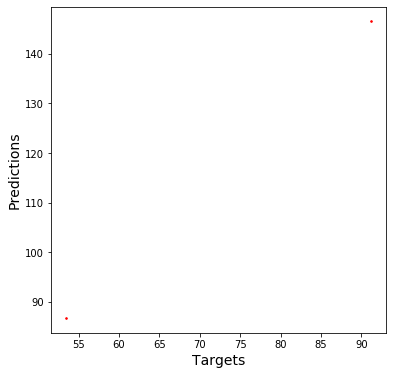

In [1435]:
plt.figure(figsize=(6,6))
plt.scatter(y_val, y_val_rf_pred, 10, marker='.', c='r')
plt.xlabel('Targets',size=14)
plt.ylabel('Predictions',size=14)
#plt.xlim(19.1,23.5)
#plt.ylim(19.1,23.5)
#_ = plt.plot([19.1,23.5],[19.1,23.5])
plt.show()

### Linear regression

In [1436]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1437]:
#reg = SGDRegressor(penalty='elasticnet',l1_ratio=0.15,alpha=0.0001)
#reg.fit(x_train,y_train['hotel_room_price_per_person_avg'].ravel())

In [1438]:
y_train_reg_pred = reg.predict(x_train)
y_val_reg_pred = reg.predict(x_val)

In [1439]:
R2_train=reg.score(x_train,y_train)
adj_R2_train=1-(1-R2_train)*(x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1)

R2_val=reg.score(x_val,y_val)
adj_R2_val=1-(1-R2_val)*(x_val.shape[0]-1)/(x_val.shape[0]-x_val.shape[1]-1)

print(R2_train)
print(adj_R2_train)
print()
print(R2_val)
print(adj_R2_val)

0.6304927928193366
0.6097772649069917

-1.5059245867937383
1.029481465726985


In [1440]:
#y_train_medium_class = y_train[(y_train['hotel_room_price_per_person_avg']>50.0) & ((y_train['hotel_room_price_per_person_avg']<150.0))]
#medium_class_indexes = np.array(y_train_medium_class.index)
#x_train_medium_class = x_train.loc[medium_class_indexes]

In [1441]:
#R2_train_mc=reg.score(x_train_medium_class,y_train_medium_class)
#adj_R2_train_mc=1-(1-R2_train_mc)*(x_train_medium_class.shape[0]-1)/(x_train_medium_class.shape[0]-x_train_medium_class.shape[1]-1)

#print(R2_train_mc)
#print(adj_R2_train_mc)

In [1442]:
# get intercept
const=reg.intercept_
print ('intercept = ',const)

# get weights
reg_summary = pd.DataFrame(train_test_scaled_inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_[0]
reg_summary.loc[0:34]

intercept =  [42.2889297]


,Features,Weights
0,hotel_stars,14.479411
1,hotel_overall_rating,17.662417
2,hotel_cleanliness_rating,-8.400290
3,hotel_comfort_rating,45.038557
4,hotel_location_rating,4.405175
5,hotel_facilities_rating,5.839651
6,hotel_staff_rating,3.640590
7,hotel_value_rating,-59.630792
8,hotel_wifi_rating,-1.953769
9,0_pc_neg,-0.457569


In [1443]:
y_val[50:60]

,hotel_room_price_per_person_avg


In [1444]:
y_val_reg_pred[50:60]

array([], shape=(0, 1), dtype=float64)

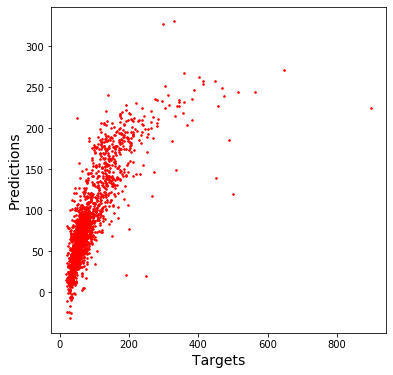

In [1445]:
plt.figure(figsize=(6,6))
plt.scatter(y_train, y_train_reg_pred, 10, marker='.', c='r')
plt.xlabel('Targets',size=14)
plt.ylabel('Predictions',size=14)
#plt.xlim(0.0,300.0)
#plt.ylim(0.0,300.0)
#_ = plt.plot([0.0,300.0],[0.0,300.0])
plt.show()

### Select hotels for which model works well

In [1446]:
y_train_reg_pred_reshaped = y_train_reg_pred.reshape(-1)

In [1447]:
y_train_array = np.array(y_train['hotel_room_price_per_person_avg'])
y_train_index_vec = list(y_train.index)

In [1448]:
subset_hotels_count_num=0
subset_hotels_diff_vec=[]
subset_hotels_price_vec=[]
subset_hotels_index_vec=[]

for idx in range(0,len(y_train_reg_pred_reshaped)):
    percent_diff = (y_train_reg_pred_reshaped[idx]-y_train_array[idx])/y_train_array[idx]
    subset_hotels_diff_vec.append(percent_diff)
    if abs(percent_diff)<0.23:
        subset_hotels_price_vec.append(y_train_array[idx])
        subset_hotels_index_vec.append(y_train_index_vec[idx])
        subset_hotels_count_num+=1

In [1449]:
len(subset_hotels_index_vec)

824

In [1450]:
reg.score(x_train.loc[subset_hotels_index_vec],y_train.loc[subset_hotels_index_vec])

0.9362406502857156

In [1451]:
df_hotel_detailed_info_list_filtered_merged.loc[subset_hotels_index_vec].to_csv('./datasets/input_app/df_hotels.csv',index=False)

### Pickle model

In [1452]:
regression_model_filename = 'price_regression_model.sav'
pickle.dump(reg, open(regression_model_filename, 'wb'))

### Write out needed parameters

In [1453]:
aux_info_1_filename = 'categorical_features.sav'
pickle.dump(categorical_features, open(aux_info_1_filename, 'wb'))

aux_info_2_filename = 'features_complete_list.sav'
pickle.dump(features_complete_list, open(aux_info_2_filename, 'wb'))

aux_info_3_filename = 'features_complete_list_dummies.sav'
pickle.dump(train_test_scaled_inputs.columns.values, open(aux_info_3_filename, 'wb'))

## Predictions by varing parameters

In [431]:
input_datapoint = df_hotel_detailed_info_list_filtered_merged.iloc[[10]]
input_datapoint.reset_index(drop=True,inplace=True)

In [432]:
input_datapoint

,hotel_name,hotel_url,hotel_stars,hotel_address,hotel_overall_rating,hotel_rating_breakdown,hotel_room_name,hotel_room_capacity,hotel_room_price,hotel_address_zip_code,...,3_pc_pos,4_pc_pos,5_pc_pos,6_pc_pos,7_pc_pos,8_pc_pos,9_pc_pos,10_pc_pos,11_pc_pos,12_pc_pos
0,Pavilion Grand Hotel,pavilion-grand.en-gb,4.0,"30 Lake Avenue, Saratoga Springs, NY 12866, Un...",9.4,"[['Cleanliness', '9.5'], ['Comfort', '9.6'], [...",Traditional King Bedroom,2.0,189.0,128,...,4.6875,1.5625,0.0,0.78125,0.78125,9.375,4.6875,0.78125,21.875,7.8125


### Modify some columns

In [433]:
#input_datapoint.at[0,'11_neg'] = 0.00
#input_datapoint.at[0,'6_neg'] = 0.00

### Scale and create dummy columns

In [434]:
input_features = input_datapoint[features_complete_list]
input_target = input_datapoint[['hotel_room_price_per_person_avg']]

scaled_input = input_features.copy()

#input_num_features = scaled_input.drop(categorical_features,axis=1)
#no_scaling_features = features_list3#+features_list4
#input_num_scaled_features = input_num_features.drop(no_scaling_features,axis=1)
#input_num_scaled_features_col = input_num_scaled_features.columns.values
#input_num_scaled_features = scaler.transform(input_num_scaled_features.values)
#scaled_input[input_num_scaled_features_col] = input_num_scaled_features

scaled_input = scaled_input.reindex(columns = train_test_scaled_inputs.columns, fill_value=0)
for cat in categorical_features:
    dummy_cat = cat+'_'+str(input_features[cat].values[0])
    if dummy_cat in scaled_input.columns:
        scaled_input.iloc[0, scaled_input.columns.get_loc(dummy_cat)] = 1

### Get new prediction

In [435]:
input_rf_pred = reg.predict(scaled_input)

In [436]:
#### new prediction #####
input_rf_pred

array([[99.32788581]])

In [440]:
#### old prediction #####
reg.predict(x_train.loc[[10]])

array([[99.32788581]])

In [439]:
#### truth #####
y_train.loc[[10]]

,hotel_room_price_per_person_avg
10,92.166667
